In [135]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydata = pd.read_csv(city_data_to_load)
ridedata = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge1  = pd.merge(citydata, ridedata, on = "city")

# Display the data table for preview
merge1.head(10)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


## Bubble Plot of Ride Sharing Data

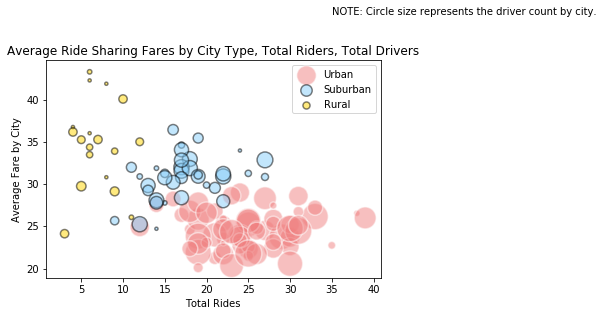

In [136]:
# Obtain the x and y coordinates for each of the three city types
avgfare = merge1.groupby("city")["fare"].mean()

totrides = merge1.groupby("city")["ride_id"].count()

totdrivers = merge1.groupby("city")["driver_count"].mean()

citytype = citydata.set_index("city")["type"]
citytype.value_counts()

cityrideshare_data = pd.DataFrame({"Average Fares":avgfare,"Total Rides": totrides,"Total Drivers": totdrivers,"City Type": citytype})

urban = cityrideshare_data.loc[cityrideshare_data ["City Type"] == "Urban"]
suburban = cityrideshare_data.loc[cityrideshare_data ["City Type"] == "Suburban"]
rural = cityrideshare_data.loc[cityrideshare_data ["City Type"] == "Rural"]


# Build the scatter plots for each city types

##Urban
plt.scatter(urban["Total Rides"], urban["Average Fares"], color = "lightcoral", edgecolors="white", s = urban["Total Drivers"]*10, alpha = 0.5, linewidth = 1.5, label = "Urban")
##suburban
plt.scatter(suburban["Total Rides"], suburban["Average Fares"], color = "lightskyblue", edgecolors="black", s = suburban["Total Drivers"]*10, alpha = 0.5, linewidth = 1.5, label = "Suburban")
##rural
plt.scatter(rural["Total Rides"], rural["Average Fares"], color = "gold", edgecolors="black", s = rural["Total Drivers"]*10, alpha = 0.5, linewidth = 1.5, label = "Rural")

# Incorporate the other graph properties
plt.title("Average Ride Sharing Fares by City Type, Total Riders, Total Drivers")
plt.xlabel("Total Rides")
plt.ylabel("Average Fare by City")


# Create a legend
plt.legend(loc = "upper right")

# Incorporate a text label regarding circle size
plt.text(35, 50,"NOTE: Circle size represents the driver count by city.")

# Save Figure
# plt.savefig("Pyberbubble.png")


In [137]:
# Show plot
plt.show()

## Total Fares by City Type

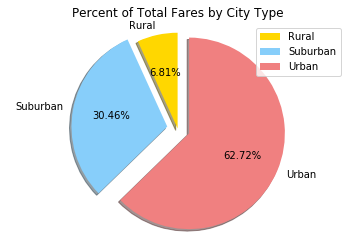

In [10]:
# Calculate Type Percents

cf_piechart = merge1.groupby(["type"])["fare"].sum()

cf_piechart.index

# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]

#Only explode the third section of the pie chart.

explode = (0,0.11, 0.13)

#Create the pie chart.
plt.pie(cf_piechart, labels = cf_piechart.index, autopct = "%1.2f%%",colors = colors, explode = explode, shadow = True, startangle = 90)

#Tell Matplotlib that we want a pie chart with equal axes.
plt.axis("equal")
plt.title("Percent of Total Fares by City Type")
#Add the legend.
plt.legend(loc = "upper right")

#Show the chart.
plt.show()
# Save Figure
# plt.savefig("Fares by City Type.png")



In [11]:
# Show Figure
plt.show()

## Total Rides by City Type

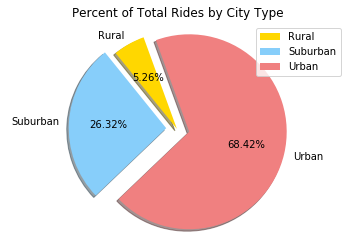

In [14]:
# Calculate Ride Percents
rides_citytype = merge1.groupby("type")["ride_id"].count()

rides_citytype.index


# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]

#Only explode the third section of the pie chart.

explode = (0,0.11, 0.13)

#Create the pie chart.
plt.pie(rides_citytype, labels = rides_citytype.index, autopct = "%1.2f%%",colors = colors, explode = explode, shadow = True, startangle = 110)
plt.title("Percent of Total Rides by City Type")
#Tell Matplotlib that we want a pie chart with equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "upper right")

#Show the chart.
plt.show()
# Save Figure
# plt.savefig("Rides by City Type.png")


In [141]:
# Show Figure
plt.show()

## Total Drivers by City Type

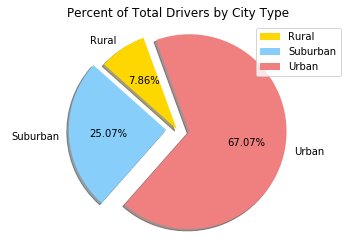

In [15]:
# Calculate Driver Percents
drivers_type = merge1.groupby("type")["driver_count"].mean()

drivers_type.index


# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]

#Only explode the third section of the pie chart.

explode = (0,0.11, 0.13)

#Create the pie chart.
plt.pie(drivers_type, labels = drivers_type.index, autopct = "%1.2f%%",colors = colors, explode = explode, shadow = True, startangle = 110)

#Tell Matplotlib that we want a pie chart with equal axes.
plt.axis("equal")
plt.title("Percent of Total Drivers by City Type")
#Add the legend.
plt.legend(loc = "upper right")

#Show the chart.
plt.show()
# Save Figure
# plt.savefig("Drivers by City Type.png")


In [143]:
# Show Figure
plt.show()